In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Equations from "Estimating Ocean Vector Winds and Currents Using a Ka-Band Pencil-Beam Doppler Scatterometer" by E. Rodriguez
# FIXME is SNR 1?

phi = np.deg2rad(np.linspace(27, 55)) # rad, incidence angle 
Td = 0.35e-3 # s # below eq. 7
Tw = 0.2 # m/s # below eq. 7
SNR = 1e6
gamma_N = SNR / (1 + SNR) # above eq. 4
T = (Tw**(-2) + Td**(-2) * np.sin(phi)**2)**2 # eq. 12
Tc = T * np.sqrt(1 + np.log10(gamma_N)) # eq. 11 FIXME log10 or log?
( Td**(-2) )**2

# 1 / (2 * )

66638900458142.445

In [4]:
np.exp(-8*(np.pi * sigma_v * T_s / Lambda)**2) 

NameError: name 'sigma_v' is not defined

In [36]:
np.exp(-8*(np.pi * sigma_v * T_s / Lambda)**2) 

array([1.        , 0.99998562, 0.99994249, 0.99987062, 0.99976999,
       0.99964064, 0.99948256, 0.99929578, 0.9990803 , 0.99883614,
       0.99856333, 0.9982619 , 0.99793186, 0.99757324, 0.99718608,
       0.9967704 , 0.99632626, 0.99585367, 0.99535269, 0.99482335,
       0.99426571, 0.99367981, 0.99306569, 0.99242342, 0.99175305,
       0.99105463, 0.99032823, 0.98957391, 0.98879173, 0.98798176,
       0.98714406, 0.98627872, 0.9853858 , 0.98446539, 0.98351755,
       0.98254237, 0.98153994, 0.98051033, 0.97945364, 0.97836996,
       0.97725938, 0.97612199, 0.97495788, 0.97376717, 0.97254995,
       0.97130631, 0.97003638, 0.96874025, 0.96741803, 0.96606984])

In [40]:
(1 + N_S)**2 - corr_T_s**2

array([3.        , 3.00002875, 3.00011501, 3.00025875, 3.00045996,
       3.00071859, 3.00103461, 3.00140795, 3.00183856, 3.00232636,
       3.00287127, 3.00347319, 3.00413201, 3.00484763, 3.00561993,
       3.00644876, 3.00733399, 3.00827547, 3.00927303, 3.0103265 ,
       3.0114357 , 3.01260044, 3.01382053, 3.01509575, 3.01642589,
       3.01781071, 3.01924999, 3.02074348, 3.02229092, 3.02389205,
       3.0255466 , 3.02725428, 3.02901482, 3.0308279 , 3.03269323,
       3.03461049, 3.03657935, 3.03859949, 3.04067056, 3.04279222,
       3.04496411, 3.04718587, 3.04945712, 3.0517775 , 3.0541466 ,
       3.05656404, 3.05902942, 3.06154233, 3.06410235, 3.06670906])

In [54]:
# equations from "Doppler radar and weather observations" by Richard J. Doviak

Lambda = 0.055 # m
sigma_v = np.linspace(0,10) # m/s
var_v = sigma_v**2
M = np.append(1, np.arange(5, 50,10)) # number of samples
T_s = 1.15e-4 # sample separation time (time between bursts), s
N_S = 1 # noise to signal ration approx 1

# eq. 6.5
corr_T_s = np.exp(-8*(np.pi * sigma_v * T_s / Lambda)**2) 

# eq. 6.11b 
def sigma_n(sigma, T_s, Lambda):
    return 2*sigma *T_s/Lambda
sigma_vn = sigma_n(sigma_v, T_s, Lambda)

# eq. 6.22b # NOTE if sample pairs are independent
v_var1 = Lambda**2 * (32 * np.pi**2 * np.outer(M, corr_T_s**2) * T_s**2)**(-1) * ((1 + N_S)**2 - corr_T_s**2) 
v1_std = np.sqrt(v_var1)

# eq. 6.23 NOTE only for high SNR, narrow spectral widths and contiguous pairs
v_var2 = np.outer(sigma_v * Lambda , 1 / (8 * M * T_s * np.sqrt(np.pi)))
v2_std = np.sqrt(v_var2)

# eq. 6.26 NOTE only for gaussian spectra and very high correlation been pulses 
v_var3 = np.outer(Lambda**2 / (4*M*T_s**2), sigma_vn / (4*np.sqrt(np.pi)) + 2*sigma_vn**2 * N_S + 1 / 12 * N_S**2)
v3_std = np.sqrt(v_var3)

# eq. 6.38 NOTE only for high SNR
v_var_crlb1 = 3 * Lambda**2 * sigma_vn**4 / (np.outer(M * T_s**2, (1 - 12*sigma_vn**2)))
v1_crlb_std = np.sqrt(v_var_crlb1)

# eq. 6.39 NOTE only for low SNR
v_var_crlb2 = np.sqrt(np.pi) * Lambda**2 * np.outer(sigma_vn**3, 1 / M) / T_s**2 * N_S**2
v2_crlb_std = np.sqrt(v_var_crlb2)


Text(0, 0.5, '$\\sigma_{\\hat{v}}$ [$m/s$]')

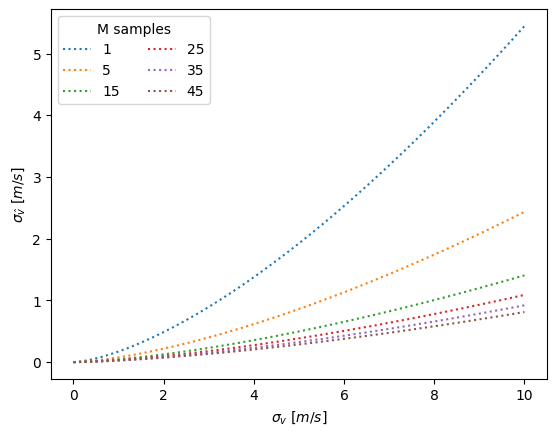

In [65]:
# _ = plt.plot(sigma_v, v1_std.T, '--')
# _ = plt.plot(sigma_v, v2_std, '.')
# _ = plt.plot(sigma_v, v3_std.T, '-*')
# _ = plt.plot(sigma_v, v1_crlb_std.T)
_ = plt.plot(sigma_v, v2_crlb_std, ':')
_ = plt.legend([str(i) for i in M], ncol =2, title = "M samples")
plt.xlabel('$\sigma_v$ [$m/s$]')
plt.ylabel('$\sigma_{\hat{v}}$ [$m/s$]')
# plt.ylim([0, 5])
# 